# Phishing Domain Detection (Model Training and Evaluation)

[Dataset Link](https://data.mendeley.com/datasets/72ptz43s9v/1)<br>
[Dataset Description](https://www.sciencedirect.com/science/article/pii/S2352340920313202)

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings
import os

In [2]:
os.chdir('..')

In [3]:
df = pd.read_csv("data/dataset_full.csv")
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [4]:
X = df.drop(columns=['phishing'])
X.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,3,0,0,1,0,0,0,0,0,0,...,-1,1,2,0,892,0,0,0,0,0
1,5,0,1,3,0,3,0,2,0,0,...,150,1,2,1,9540,1,0,0,0,0
2,2,0,0,1,0,0,0,0,0,0,...,-1,1,2,3,589,1,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,-1,1,2,0,292,1,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,306,1,2,1,3597,0,1,0,0,0


In [5]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 87209, dtype: int64

In [6]:
y.values.ravel()

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [7]:
#Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)

# checking the sizes of the sample data
print("Size of X:", X.shape)
print("Size of y:", y.shape)

Size of X: (113424, 111)
Size of y: (113424,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape

(113424, 111)

In [9]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90739, 111), (22685, 111), (90739,), (22685,))

In [10]:
# import pickle
# pickle.dump(scaler, open('scaling.pkl','wb'))

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    class_report = classification_report(predicted , true, target_names=["legitimate","malicious"])
    return accuracy, class_report



Naive Bayes Classifier
--------------------
Train Accuracy: 0.7705617209799535
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.96      0.69      0.81     62804
   malicious       0.58      0.94      0.72     27935

    accuracy                           0.77     90739
   macro avg       0.77      0.82      0.76     90739
weighted avg       0.85      0.77      0.78     90739

-----------------------------------
Test Accuracy: 0.7720960987436633
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.96      0.70      0.81     15759
   malicious       0.58      0.94      0.72      6926

    accuracy                           0.77     22685
   macro avg       0.77      0.82      0.76     22685
weighted avg       0.84      0.77      0.78     22685



Decision Tree Classifier
--------------------
Train Accuracy: 0.9999338762825246
Train Classification Report:
               precision  

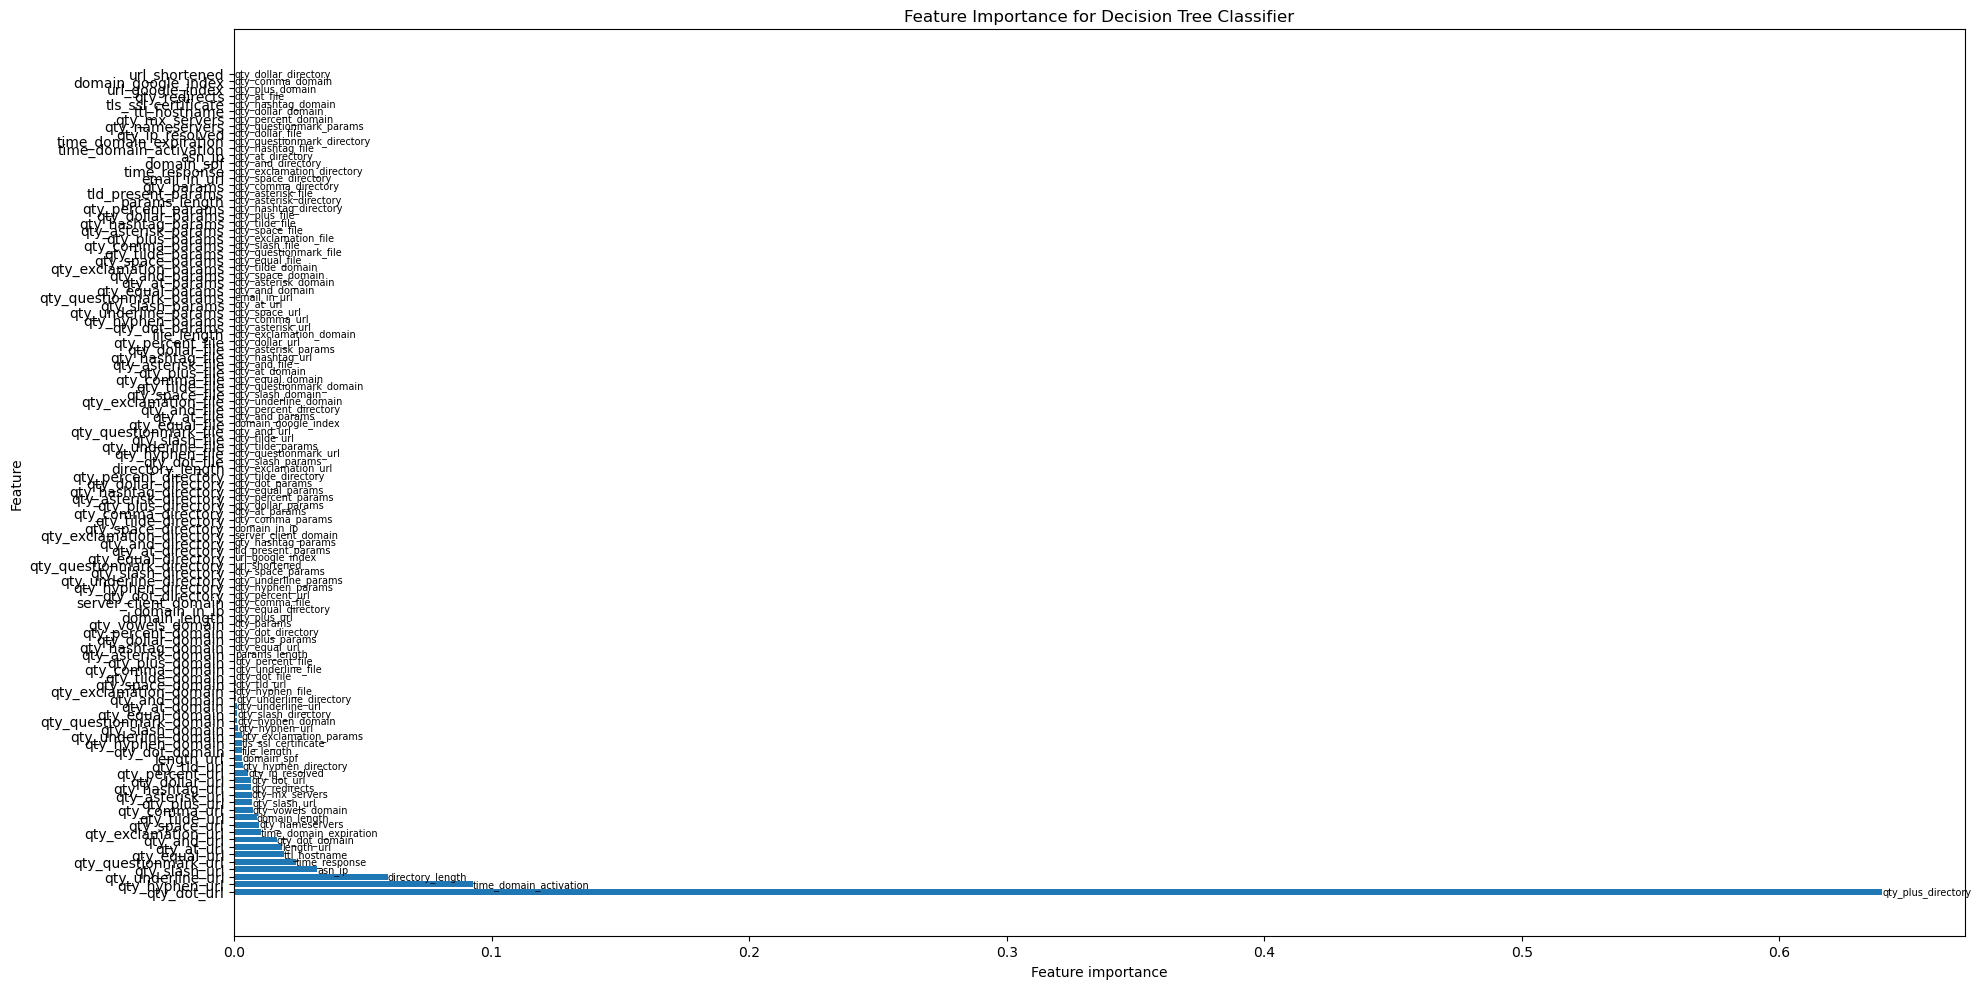

Random Forest Classifier
--------------------
Train Accuracy: 0.9999228556629454
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       1.00      1.00      1.00     45246
   malicious       1.00      1.00      1.00     45493

    accuracy                           1.00     90739
   macro avg       1.00      1.00      1.00     90739
weighted avg       1.00      1.00      1.00     90739

-----------------------------------
Test Accuracy: 0.9758871500991845
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.98     11332
   malicious       0.98      0.97      0.98     11353

    accuracy                           0.98     22685
   macro avg       0.98      0.98      0.98     22685
weighted avg       0.98      0.98      0.98     22685





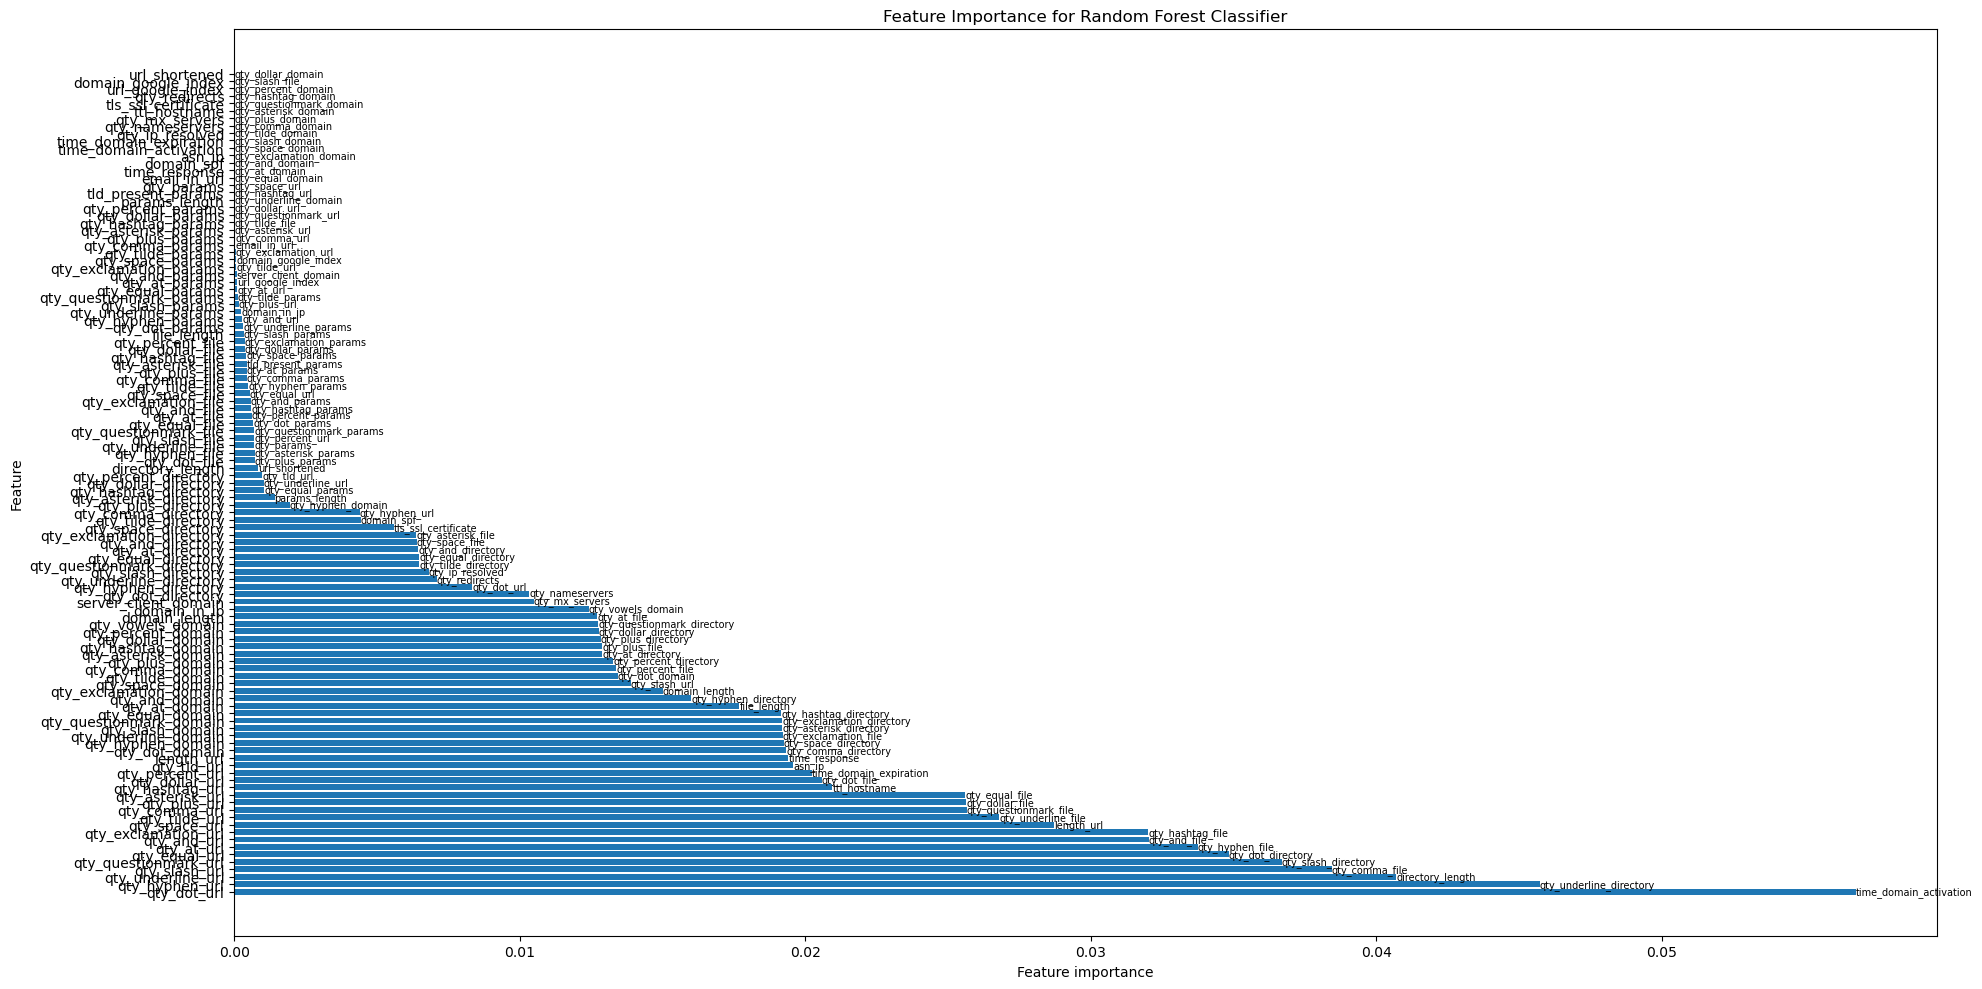

XGBClassifier
--------------------
Train Accuracy: 0.9844388851541234
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.98      0.99      0.98     45113
   malicious       0.99      0.98      0.98     45626

    accuracy                           0.98     90739
   macro avg       0.98      0.98      0.98     90739
weighted avg       0.98      0.98      0.98     90739

-----------------------------------
Test Accuracy: 0.9749173462640511
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.98     11380
   malicious       0.98      0.97      0.97     11305

    accuracy                           0.97     22685
   macro avg       0.97      0.97      0.97     22685
weighted avg       0.97      0.97      0.97     22685





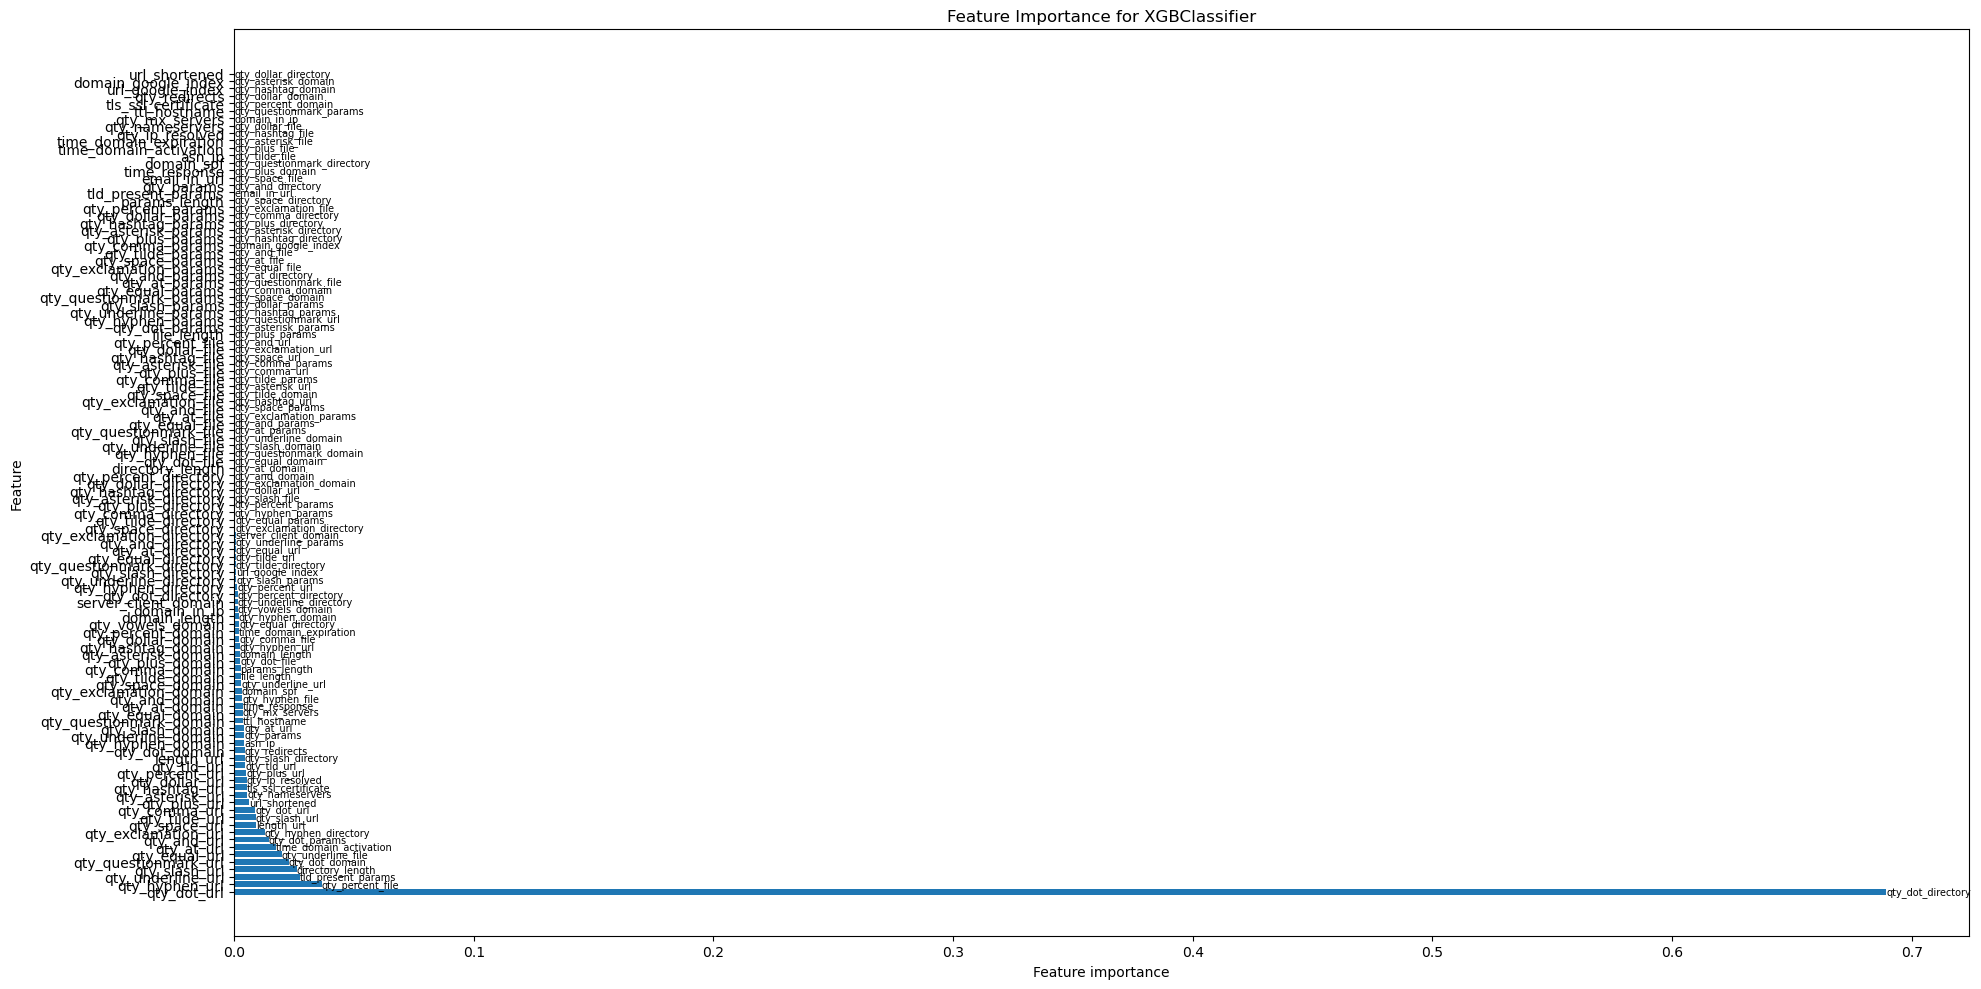

CatBoost Classifier
--------------------
Train Accuracy: 0.9836343799248394
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.98      0.98      0.98     45126
   malicious       0.98      0.98      0.98     45613

    accuracy                           0.98     90739
   macro avg       0.98      0.98      0.98     90739
weighted avg       0.98      0.98      0.98     90739

-----------------------------------
Test Accuracy: 0.9747410182940269
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.97      0.98      0.97     11354
   malicious       0.98      0.97      0.97     11331

    accuracy                           0.97     22685
   macro avg       0.97      0.97      0.97     22685
weighted avg       0.97      0.97      0.97     22685





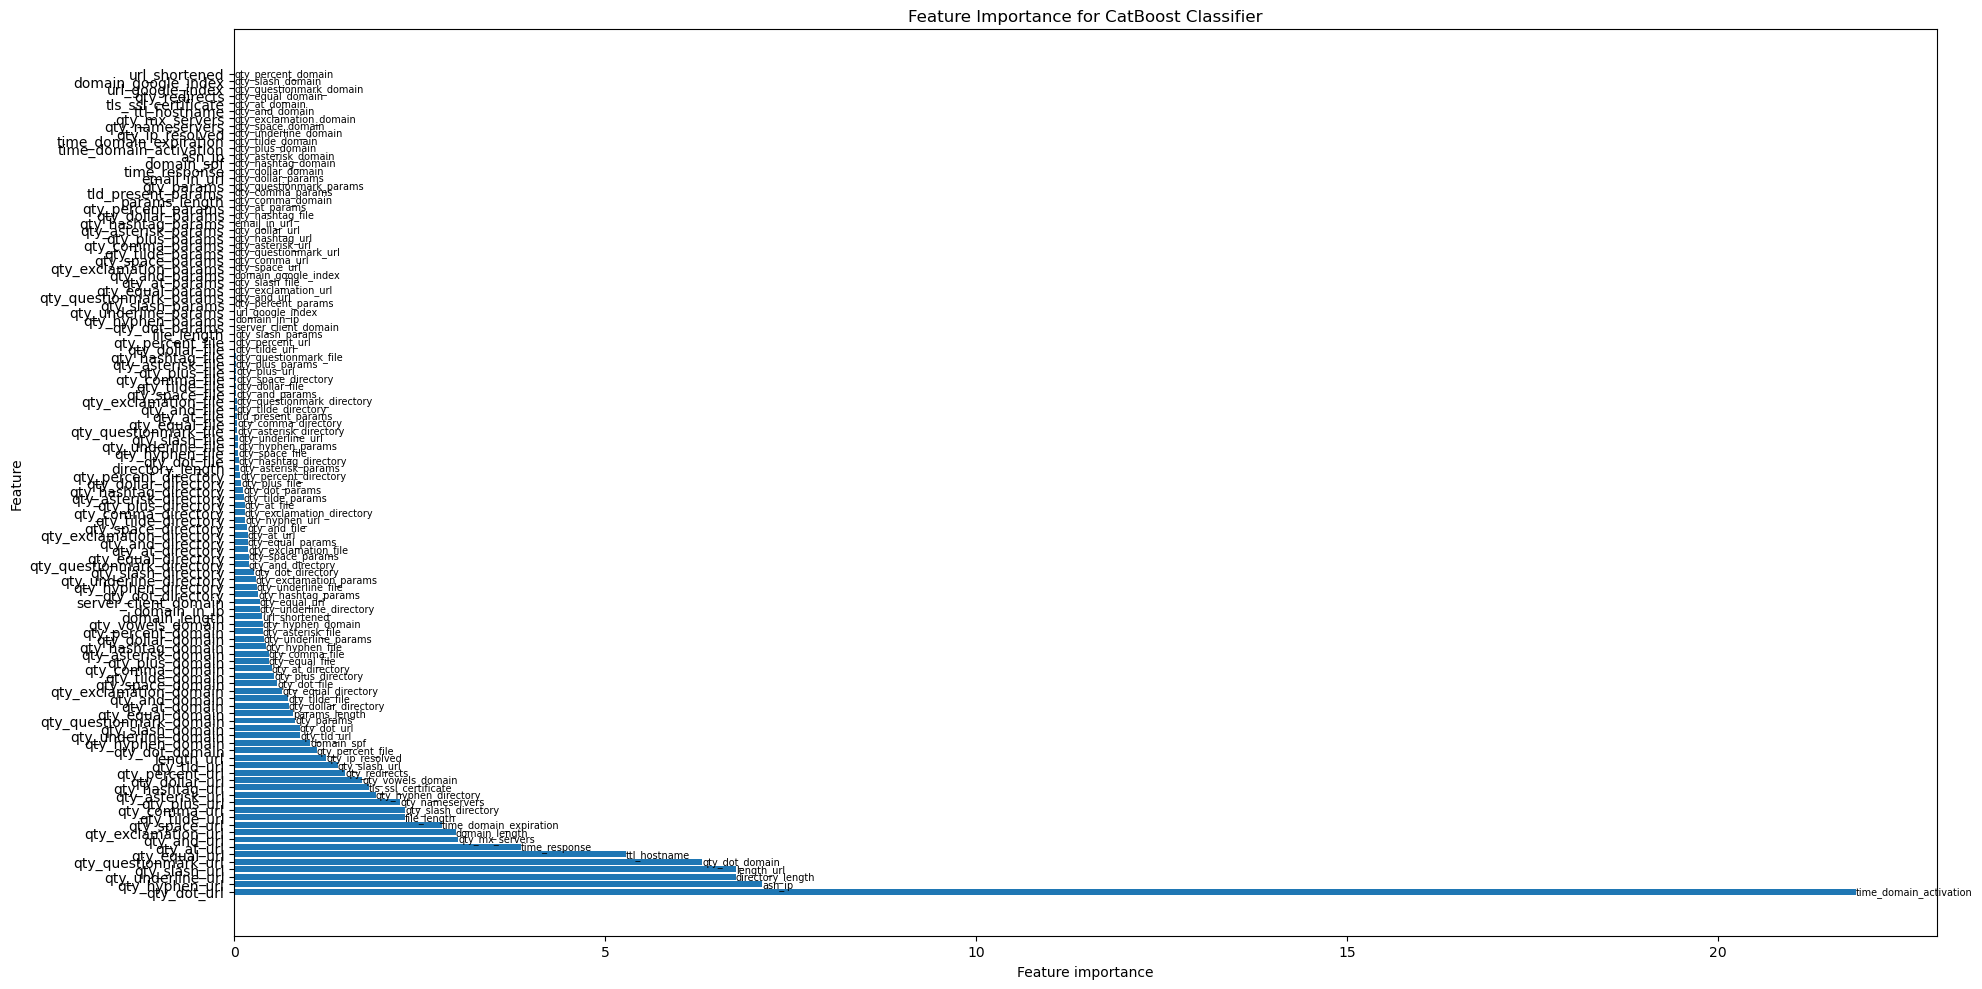

AdaBoost Classifier
--------------------
Train Accuracy: 0.9437617782871753
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.94      0.95      0.94     44476
   malicious       0.95      0.94      0.94     46263

    accuracy                           0.94     90739
   macro avg       0.94      0.94      0.94     90739
weighted avg       0.94      0.94      0.94     90739

-----------------------------------
Test Accuracy: 0.9419440158695173
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.93      0.95      0.94     11230
   malicious       0.95      0.93      0.94     11455

    accuracy                           0.94     22685
   macro avg       0.94      0.94      0.94     22685
weighted avg       0.94      0.94      0.94     22685





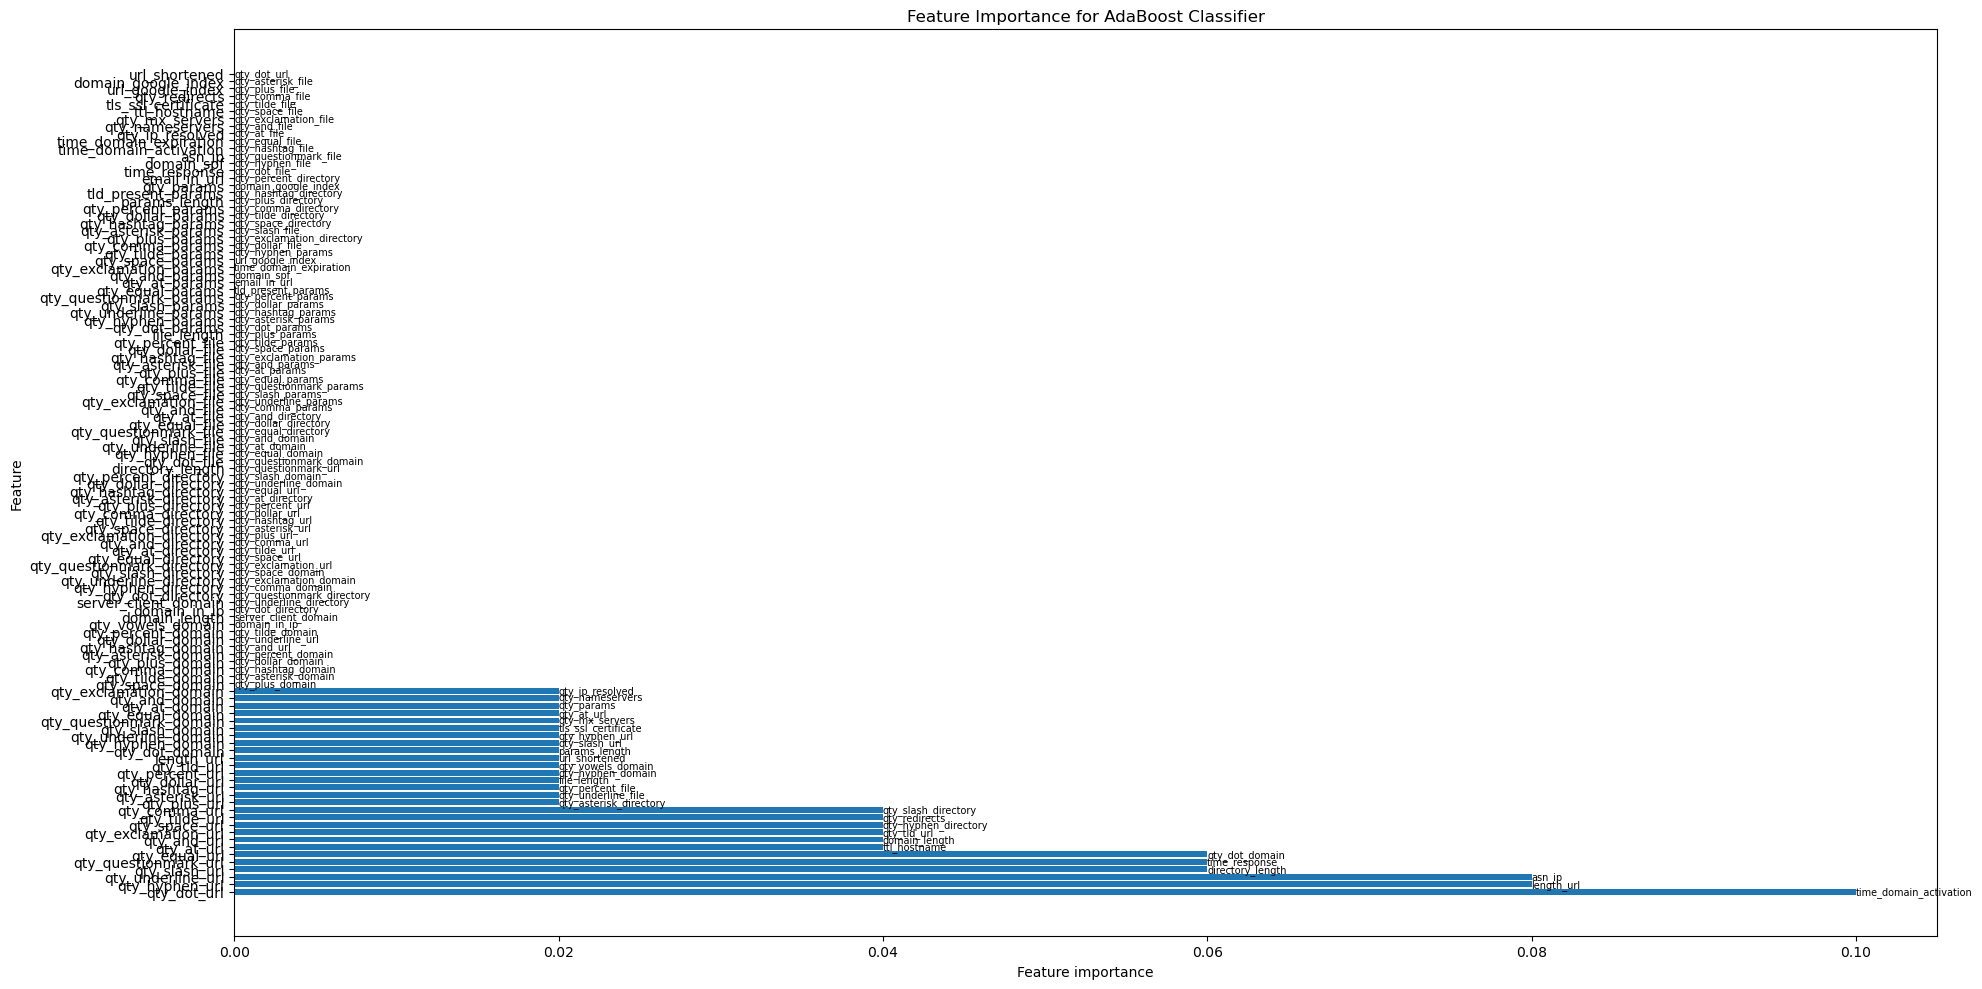

Support Vector Machine
--------------------
Train Accuracy: 0.9515753975688513
Train Classification Report:
               precision    recall  f1-score   support

  legitimate       0.94      0.96      0.95     44399
   malicious       0.96      0.94      0.95     46340

    accuracy                           0.95     90739
   macro avg       0.95      0.95      0.95     90739
weighted avg       0.95      0.95      0.95     90739

-----------------------------------
Test Accuracy: 0.950407758430681
Test Classification Report:
               precision    recall  f1-score   support

  legitimate       0.94      0.96      0.95     11192
   malicious       0.96      0.94      0.95     11493

    accuracy                           0.95     22685
   macro avg       0.95      0.95      0.95     22685
weighted avg       0.95      0.95      0.95     22685





In [12]:
# Define models
models = {
    "Naive Bayes Classifier": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Machine": SVC()
}

model_list = []
train_accuracies = []
test_accuracies = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy, model_classification_report_train = evaluate_model(y_train, y_train_pred)
    model_test_accuracy, model_classification_report_test = evaluate_model(y_test, y_test_pred)

    print(name)
    print('-' * 20)
    print('Train Accuracy:', model_train_accuracy)
    print('Train Classification Report:\n', model_classification_report_train)
    print('-' * 35)
    print('Test Accuracy:', model_test_accuracy)
    print('Test Classification Report:\n', model_classification_report_test)
    print('=' * 35)
    print('\n')
    
    model_list.append(name)
    train_accuracies.append(model_train_accuracy)
    test_accuracies.append(model_test_accuracy)

    # Plot feature importance for models that support it
    X_cols = [col for col in df.columns if col != "phishing"]
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]  # Sort indices by importance, descending

        plt.figure(figsize=(20, 10))
        n_features = X_train.shape[1]
        bars = plt.barh(range(len(X_cols)), importances[indices], align='center')
        plt.yticks(np.arange(n_features), X_cols)
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")
        plt.title(f"Feature Importance for {name}")
        
        # Add labels on the bars
        for bar, index in zip(bars, indices):
            plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, X_cols[index], 
                 va='center', ha='left', fontsize=7)
        
        plt.tight_layout()  # Adjust layout to prevent overlapping
        plt.show()

In [13]:
results_df = pd.DataFrame(list(zip(model_list, test_accuracies)), columns=['Model Name', 'Test Accuracy']).sort_values(by=["Test Accuracy"],ascending=False)
results_df

,Model Name,Test Accuracy
2,Random Forest Classifier,0.975887
3,XGBClassifier,0.974917
4,CatBoost Classifier,0.974741
1,Decision Tree Classifier,0.963985
6,Support Vector Machine,0.950408
5,AdaBoost Classifier,0.941944
0,Naive Bayes Classifier,0.772096


In [14]:
import pickle

best_model_name = results_df.iloc[0]['Model Name']
best_model = models[best_model_name]
# pickle.dump(best_model, 'best_model.pkl')

print(f"The best model is {best_model_name} with a test accuracy of {results_df.iloc[0]['Test Accuracy']:.4f}")

The best model is Random Forest Classifier with a test accuracy of 0.9759
